# Training Stability Analysis

Training stability comparison of **CRISPR-M** and **L1-Grouped-Complete** using results from three training runs.  
Performance variation analysis across metrics to evaluate differences.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_image as dfi
import ace_tools_open as tools
from matplotlib.gridspec import GridSpec
from scipy.stats import ttest_rel, wilcoxon

## 1. Define evaluation metrics

Metric values from three training runs for each model.

In [2]:
results = {
    "CRISPR-M": {
        "Accuracy": [0.9945371327329101, 0.9946847777941827, 0.9946847777941827],
        "Precision": [1.0, 0.6578947368421053, 0.8333333333333334],
        "Recall": [0.075, 0.20833333333333334, 0.125],
        "F1-score": [0.13953488372093023, 0.3164556962025316, 0.21739130434782608],
        "AUPRC": [0.34776019636693456, 0.38938165961887333, 0.20353706607156094],
        "AUROC": [0.9280843111045101, 0.9636578543492251, 0.7432711190322954],
        "F-beta Score": [0.09202453987730061, 0.2413127413127413, 0.15060240963855423],
        "Spearman Correlation": [0.11362482429320214, 0.12306697737598128, 0.0645705470545547],
    },
    "L1-Grouped-Complete": {
        "Accuracy": [0.9948816378758797, 0.9947832078350313, 0.9947832078350313],
        "Precision": [0.9444444444444444, 0.8181818181818182, 0.7333333333333333],
        "Recall": [0.14166666666666666, 0.15, 0.18333333333333332],
        "F1-score": [0.24637681159420294, 0.2535211267605634, 0.2933333333333333],
        "AUPRC": [0.46755540307147503, 0.4637389646374179, 0.45600195777967406],
        "AUROC": [0.981214829116953, 0.9796908262785287, 0.9802824397247387],
        "F-beta Score": [0.1706827309236948, 0.17928286852589642, 0.21568627450980393],
        "Spearman Correlation": [0.12772712785127605, 0.1273226183594907, 0.1274796481939872],
    }
}

## 2. Compute mean, std, and CV%

In [3]:
stability_results = {}

In [4]:
for model, metrics in results.items():
    stability_results[model] = {}
    for metric, values in metrics.items():
        mean_value = np.mean(values)
        std_dev = np.std(values, ddof=1)
        cv = (std_dev / mean_value) * 100 

        stability_results[model][metric] = {
            "Mean": mean_value,
            "Std. Dev.": std_dev,
            "CV (%)": cv
        }

In [5]:
data = {
    metric: {
        ('Mean', 'CRISPR-M'): stability_results['CRISPR-M'][metric]['Mean'],
        ('Mean', 'L1-Grouped-Complete'): stability_results['L1-Grouped-Complete'][metric]['Mean'],
        ('Std. Dev.', 'CRISPR-M'): stability_results['CRISPR-M'][metric]['Std. Dev.'],
        ('Std. Dev.', 'L1-Grouped-Complete'): stability_results['L1-Grouped-Complete'][metric]['Std. Dev.'],
        ('CV (%)', 'CRISPR-M'): stability_results['CRISPR-M'][metric]['CV (%)'],
        ('CV (%)', 'L1-Grouped-Complete'): stability_results['L1-Grouped-Complete'][metric]['CV (%)'], 
    }
    for metric in stability_results['CRISPR-M'].keys()
}
df = pd.DataFrame(data).T.reset_index()

## 3. Stability metrics table

In [6]:
mean_min = df[[('Mean', 'CRISPR-M'), ('Mean', 'L1-Grouped-Complete')]].min().min()
mean_max = df[[('Mean', 'CRISPR-M'), ('Mean', 'L1-Grouped-Complete')]].max().max()

std_min = df[[('Std. Dev.', 'CRISPR-M'), ('Std. Dev.', 'L1-Grouped-Complete')]].min().min()
std_max = df[[('Std. Dev.', 'CRISPR-M'), ('Std. Dev.', 'L1-Grouped-Complete')]].max().max()

cv_min = df[[('CV (%)', 'CRISPR-M'), ('CV (%)', 'L1-Grouped-Complete')]].min().min()
cv_max = df[[('CV (%)', 'CRISPR-M'), ('CV (%)', 'L1-Grouped-Complete')]].max().max()

In [7]:
df = df.reset_index()

In [8]:
df_styled = df.style \
    .background_gradient(
        cmap="Greens",
        subset=[('Mean', 'CRISPR-M'), ('Mean', 'L1-Grouped-Complete')],
        vmin=mean_min,
        vmax=mean_max
    ) \
    .background_gradient(
        cmap="Reds",
        subset=[('Std. Dev.', 'CRISPR-M'), ('Std. Dev.', 'L1-Grouped-Complete')],
        vmin=std_min,
        vmax=std_max
    ) \
    .background_gradient(
        cmap="Reds",
        subset=[('CV (%)', 'CRISPR-M'), ('CV (%)', 'L1-Grouped-Complete')],
        vmin=cv_min,
        vmax=cv_max
    ) \
    .format(precision=6) \
    .hide(axis="index")

In [9]:
dfi.export(df_styled, 'training_stability_comparison.png', table_conversion='chrome')

In [10]:
tools.display_dataframe_to_user(name="Training Stability Comparison", dataframe=df_styled)

Training Stability Comparison


## 4. Visualize performance comparison

In [11]:
metrics = ["Recall", "F1-score", "AUPRC", "AUROC"]
mean_initial = [stability_results['CRISPR-M'][metric]['Mean'] for metric in metrics]
std_initial = [stability_results['CRISPR-M'][metric]['Std. Dev.'] for metric in metrics]
cv_initial = [stability_results['CRISPR-M'][metric]['CV (%)'] for metric in metrics]
mean_final = [stability_results['L1-Grouped-Complete'][metric]['Mean'] for metric in metrics]
std_final = [stability_results['L1-Grouped-Complete'][metric]['Std. Dev.'] for metric in metrics]
cv_final = [stability_results['L1-Grouped-Complete'][metric]['CV (%)'] for metric in metrics]

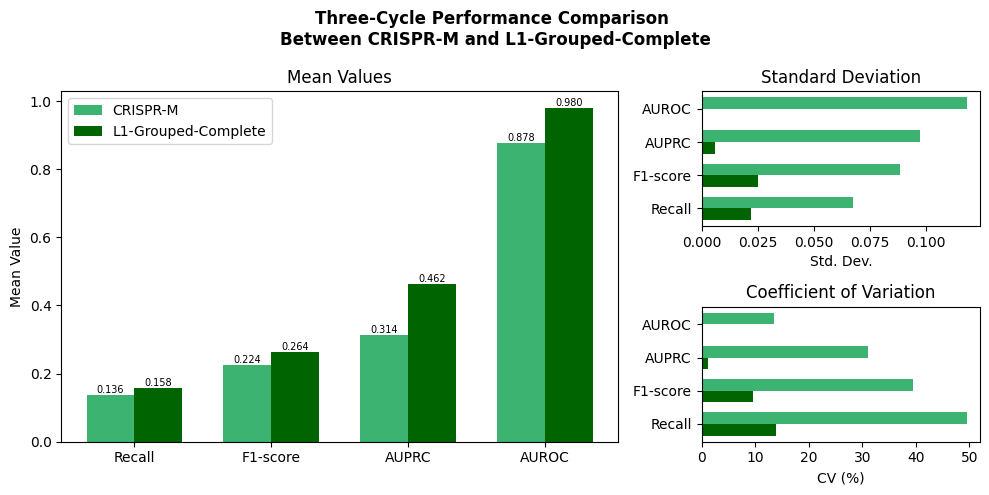

In [12]:
x = np.arange(len(metrics))
width = 0.35
fig = plt.figure(figsize=(10, 5))
plt.suptitle("Three-Cycle Performance Comparison \nBetween CRISPR-M and L1-Grouped-Complete", fontsize=12, fontweight='bold', y=0.98)
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[:, 0])
bars1 = ax1.bar(x - width/2, mean_initial, width, label='CRISPR-M', color='mediumseagreen')
bars2 = ax1.bar(x + width/2, mean_final, width, label='L1-Grouped-Complete', color='darkgreen')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 0), textcoords='offset points',
                     ha='center', va='bottom', fontsize=7)
ax1.set_xticks(x)
ax1.set_ylabel('Mean Value')
ax1.set_xticklabels(metrics)
ax1.set_title('Mean Values')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(gs[0, 1])
ax2.barh(x + width/2, std_initial, width, label='Base', color='mediumseagreen')
ax2.barh(x - width/2, std_final, width, label='Grouped', color='darkgreen')
ax2.set_yticks(x)
ax2.set_yticklabels(metrics)
ax2.set_xlabel('Std. Dev.')
ax2.set_title('Standard Deviation')

ax3 = fig.add_subplot(gs[1, 1])
ax3.barh(x + width/2, cv_initial, width, label='Base', color='mediumseagreen')
ax3.barh(x - width/2, cv_final, width, label='Grouped', color='darkgreen')
ax3.set_yticks(x)
ax3.set_yticklabels(metrics)
ax3.set_xlabel('CV (%)')
ax3.set_title('Coefficient of Variation')

plt.tight_layout()
plt.savefig('three-cycle_performance_comparison.png', dpi=300)
plt.show()